In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [12]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","Alpha","fDist","Class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,Alpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [13]:
df["Class"] = (df["Class"]=="g").astype(int)

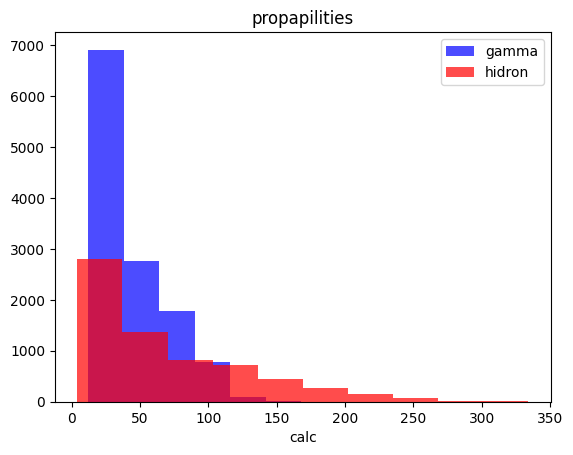

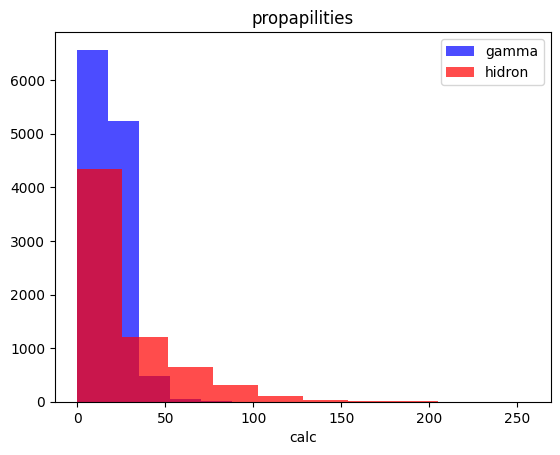

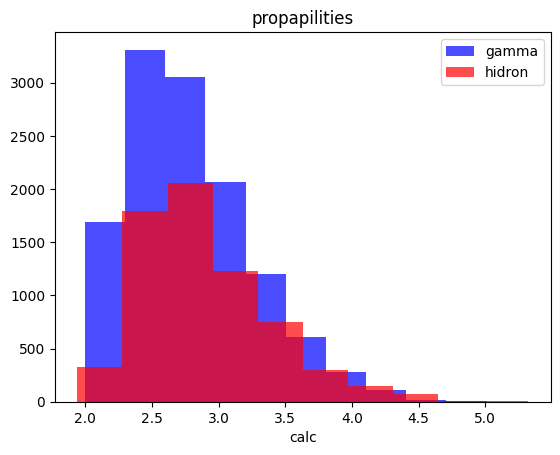

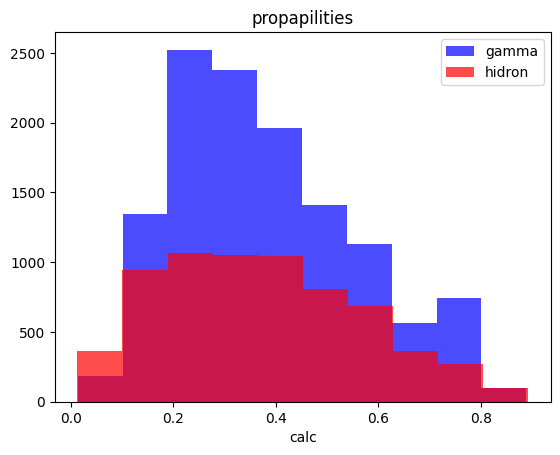

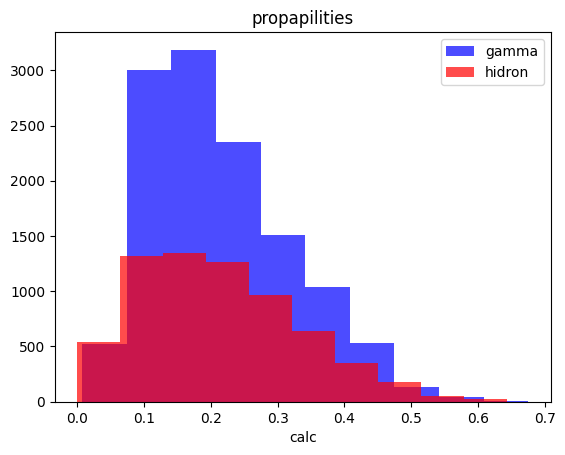

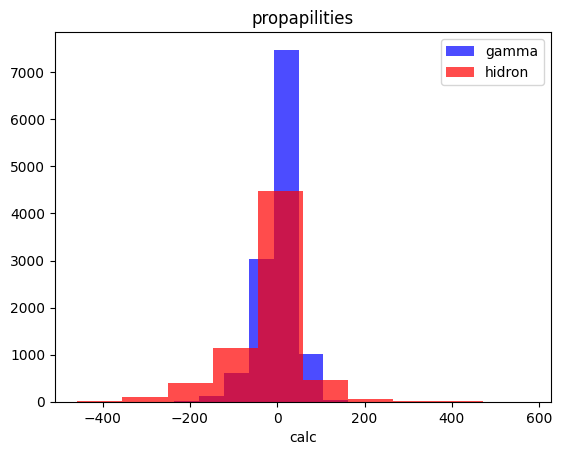

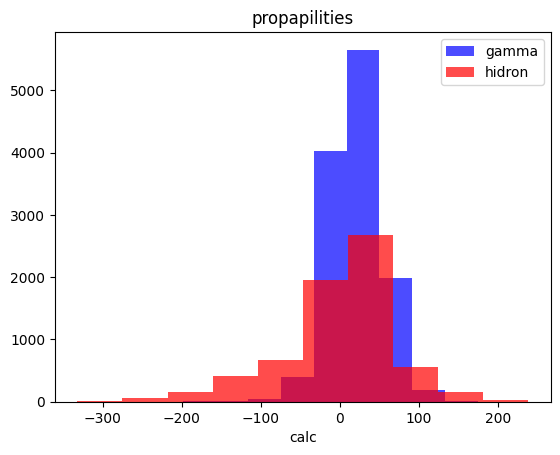

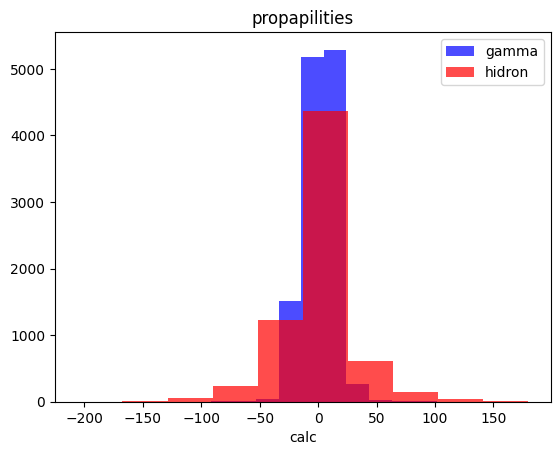

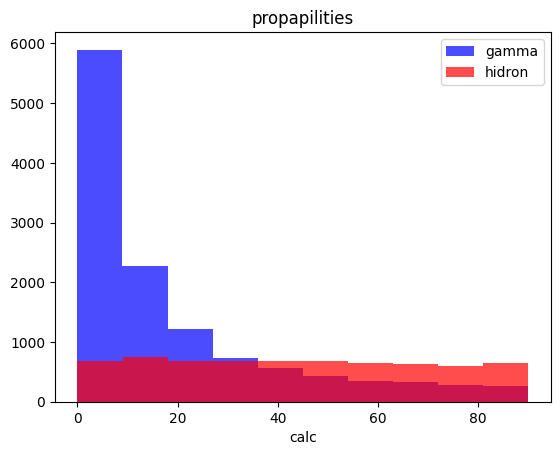

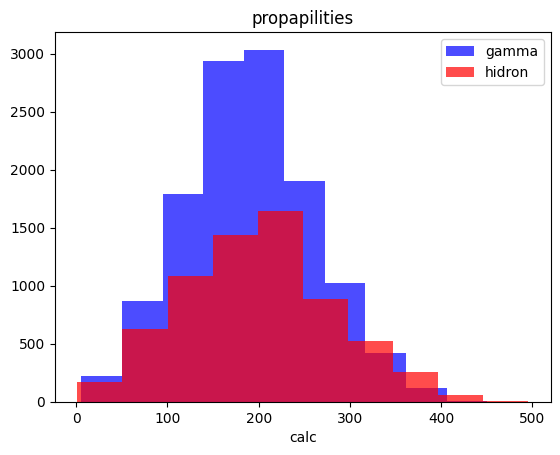

In [14]:
for label in cols[:-1]:
  plt.hist(df[df['Class']==1][label],color='blue',label='gamma',alpha=0.7)
  plt.hist(df[df['Class']==0][label],color='red',label='hidron',alpha=0.7)
  plt.title('propapilities')
  plt.xlabel('calc')
  plt.legend()
  plt.show()

In [15]:
train,vaild,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [22]:
def divide(dataframe,oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y,(-1,1))))
  return data,x,y

In [23]:
train,x_train,y_train = divide(df,True)
valid,x_valid,y_valid = divide(df,False)
test,x_test,y_test = divide(df,False)

In [26]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [28]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      6688
           1       0.73      0.90      0.81     12332

    accuracy                           0.72     19020
   macro avg       0.71      0.65      0.66     19020
weighted avg       0.71      0.72      0.70     19020

